<a href="https://colab.research.google.com/github/VighneshAlevoor/Machine_Learning_Projects/blob/master/Logistic_Customer_Leaving_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df['Gender']=df['Gender'].map({'Male':1, 'Female':0})
df['Gender']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [5]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
x=df.iloc[:,3:-1].values
y=df['Exited'].values
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [9]:
label=LabelEncoder()
x[:,1]=label.fit_transform(x[:,1])
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [0]:
columnT=ColumnTransformer([("Geography", OneHotEncoder(), [1])],remainder = 'passthrough')
x=columnT.fit_transform(x)

In [11]:
x.shape

(10000, 12)

In [0]:
col=(['Geography_1','Geography_2','Geography_3','CreditScore',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'])

In [13]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,619,0,42,2,0,1,1,1,101349
1,0,0,1,608,0,41,1,83807.9,1,0,1,112543
2,1,0,0,502,0,42,8,159661,3,1,0,113932
3,1,0,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,1,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,0,772,1,42,3,75075.3,2,1,0,92888.5


In [18]:
x.columns=col
x=x.drop(labels='Geography_3', axis=1)
x

,Geography_1,Geography_2,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,0,619,0,42,2,0,1,1,1,101349
1,0,0,608,0,41,1,83807.9,1,0,1,112543
2,1,0,502,0,42,8,159661,3,1,0,113932
3,1,0,699,0,39,1,0,2,0,0,93826.6
4,0,0,850,0,43,2,125511,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,771,1,39,5,0,2,1,0,96270.6
9996,1,0,516,1,35,10,57369.6,1,1,1,101700
9997,1,0,709,0,36,7,0,1,0,1,42085.6
9998,0,1,772,1,42,3,75075.3,2,1,0,92888.5


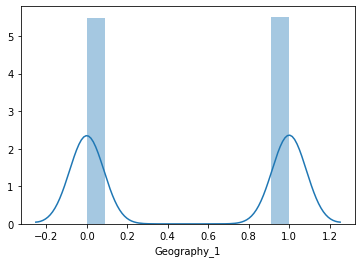

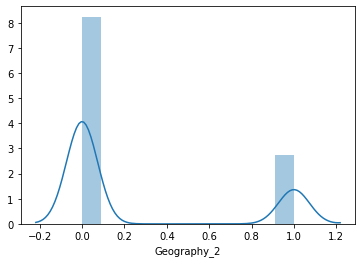

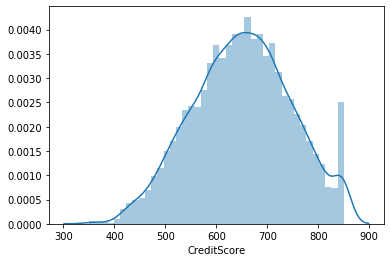

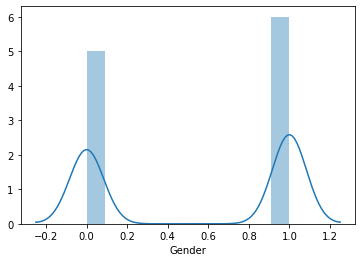

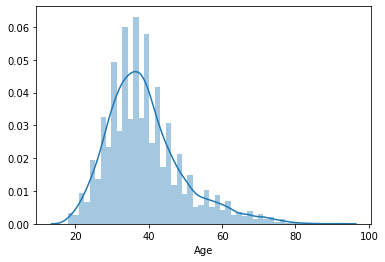

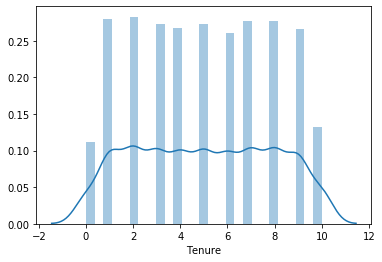

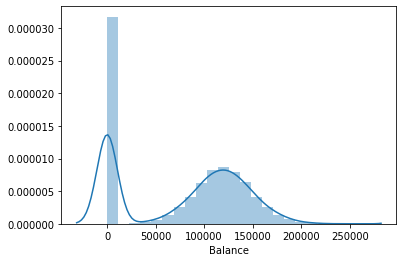

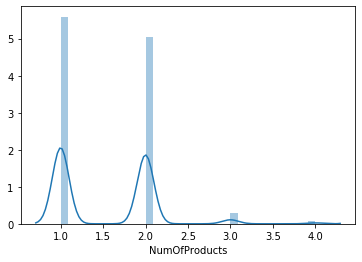

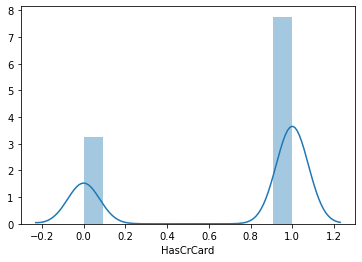

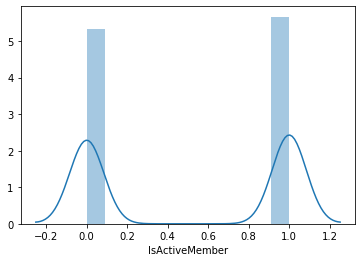

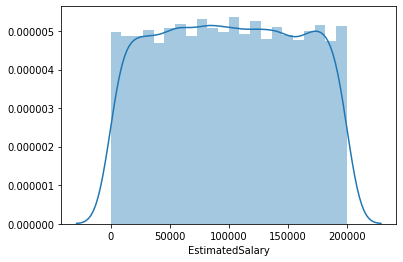

In [28]:
for col in x.columns:
  sns.distplot(x[col])
  plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
scaler=StandardScaler()
scaler.fit_transform(x)

array([[ 0.99720391, -0.57873591, -0.32622142, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.00280393, -0.57873591, -0.44003595, ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 0.99720391, -0.57873591, -1.53679418, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.99720391, -0.57873591,  0.60498839, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-1.00280393,  1.72790383,  1.25683526, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 0.99720391, -0.57873591,  1.46377078, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [34]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [0]:
y_pred_train=logistic.predict(x_train)
y_pred_test=logistic.predict(x_test)

In [38]:
score_train=accuracy_score(y_train,y_pred_train)
score_test=accuracy_score(y_test,y_pred_test)
score_train,score_test

(0.7892, 0.7928)

In [42]:
cm=confusion_matrix(y_train,y_pred_train)
cm

array([[5836,  139],
       [1442,   83]])

In [41]:
cm=confusion_matrix(y_test,y_pred_test)
cm

array([[1952,   36],
       [ 482,   30]])